### 시계열 데이터 관련

1. datetime library
   - datetime, date, time object가 있음
   - 메서드 : now(), today(),
   - 
  
2. object 이기 때문에 서로 연산할 수 있음

3. 문자열을 시계열로 데이터로 바꾸기
   1) pd.to_datetime(적용 칼럼, format='%d/%m/%y')   *format은 문자열 구조에 따라서 다양하게 응용
   2) pd.read_csv('', parse_dates=적용칼럼) : read_csv에서 datetime 오브젝트로 변환하려는 칼럼 설정하는 옵션 넣기
      

4. 시간 형식 지정자 : %a, %A, %w, Td, %b, %B, %m, %y, %Y 등 여러가지가 있음

5. 날짜 정보 출력하기
   1) datetime.datetime 클래스의 메서드 : strftime _ 시간 형식 지정자와 함께 사용되며, 시계열 데이터의 시간 요소 중 일부만을 추출할 수 있음
   2) 날짜 정보 저장하는 속성 활용하기 ex) d1[0].year/month/day

6. dt 접근자
   - dt 접근자를 사용하지 않고 특정 데이터를 접근하는 방법 = 칼럼명 & 인덱스 활용
   - 그냥 적용 칼럼 적고 dt.year/month/day 를 활용하는 방식
  
7. 새로운 날짜 생성 : pd.date_range(start='2014-12-31', end='2015-01-05')

   

In [3]:
from datetime import datetime

now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)


t1 = datetime.now()
t2 = datetime(1970, 1,1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)


diff = t1-t2
print(diff)
print(type(diff))


diff2 = t2-t1
print(diff2)
print(type(diff2))

2025-03-24 08:07:54.365173
2025-03-24 08:07:54.365174
2025-03-24 08:07:54.365173
1970-01-01 00:00:00
1970-12-12 13:24:34
20171 days, 8:07:54.365173
<class 'datetime.timedelta'>
-20172 days, 15:52:05.634827
<class 'datetime.timedelta'>


In [7]:
import pandas as pd
import os

ebola = pd.read_csv(r"C:\Users\rud92\0.ESAA\country_timeseries.csv")

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [11]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [16]:
test_df1 = pd.DataFrame({'order_day' : ['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [20]:
test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})
test_df2 = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

0   2015-01-01
1   2015-01-02
2   2015-01-03
Name: order_day, dtype: datetime64[ns]


In [39]:
now = datetime.now()
print(now)
print(type(now))

2025-03-24 08:22:37.970874
<class 'datetime.datetime'>


In [31]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2025-03-24


In [33]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

08:20:26


In [37]:
nowDatetime = now.strftime('%Y-%m-%d  %H:%M:%S')
print(nowDatetime)

2025-03-24  08:20:26


In [41]:
ebola1 = pd.read_csv(r"C:\Users\rud92\0.ESAA\country_timeseries.csv", parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [45]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [52]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


In [54]:
ebola = pd.read_csv(r"C:\Users\rud92\0.ESAA\country_timeseries.csv", parse_dates=['Date'])
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [56]:
print(ebola[['Date', 'date_dt']].head())

        Date    date_dt
0 2015-01-05 2015-01-05
1 2015-01-04 2015-01-04
2 2015-01-03 2015-01-03
3 2015-01-02 2015-01-02
4 2014-12-31 2014-12-31


In [64]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

##dt 접근자를 사용하지 않고 특정 데이터를 접근하는 방법 = 칼럼명 & 인덱스 활용

2015
1
2


In [66]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt','year']].head())

        Date    date_dt  year
0 2015-01-05 2015-01-05  2015
1 2015-01-04 2015-01-04  2015
2 2015-01-03 2015-01-03  2015
3 2015-01-02 2015-01-02  2015
4 2014-12-31 2014-12-31  2014


In [70]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt','year', 'month', 'day']].head())

        Date    date_dt  year  month  day
0 2015-01-05 2015-01-05  2015      1    5
1 2015-01-04 2015-01-04  2015      1    4
2 2015-01-03 2015-01-03  2015      1    3
3 2015-01-02 2015-01-02  2015      1    2
4 2014-12-31 2014-12-31  2014     12   31


In [77]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [87]:
print(ebola.iloc[-5:, :5])                                             ## 마지막 행과 열을 5개씩 체크    ## 데이터가 역순으로 정리돼 있기 때문 

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [89]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))                       ## 에볼라의 최초 발병일 체크

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [93]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

        Date  Day outbreak_d
0 2015-01-05  289   289 days
1 2015-01-04  288   288 days
2 2015-01-03  287   287 days
3 2015-01-02  286   286 days
4 2014-12-31  284   284 days


In [95]:
banks = pd.read_csv(r"C:\Users\rud92\0.ESAA\banklist.csv")
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [97]:
banks_no_dates = pd.read_csv(r"C:\Users\rud92\0.ESAA\banklist.csv")
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [101]:
banks = pd.read_csv(r"C:\Users\rud92\0.ESAA\banklist.csv", parse_dates=[5,6])        ##칼럼 위치를 인덱스 사용해 지정 가능
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


C:\Users\rud92\AppData\Local\Temp\ipykernel_1768\3014458039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(r"C:\Users\rud92\0.ESAA\banklist.csv", parse_dates=[5,6])        ##칼럼 위치를 인덱스 사용해 지정 가능
C:\Users\rud92\AppData\Local\Temp\ipykernel_1768\3014458039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(r"C:\Users\rud92\0.ESAA\banklist.csv", parse_dates=[5,6])        ##칼럼 위치를 인덱스 사용해 지정 가능


In [109]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [115]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [121]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

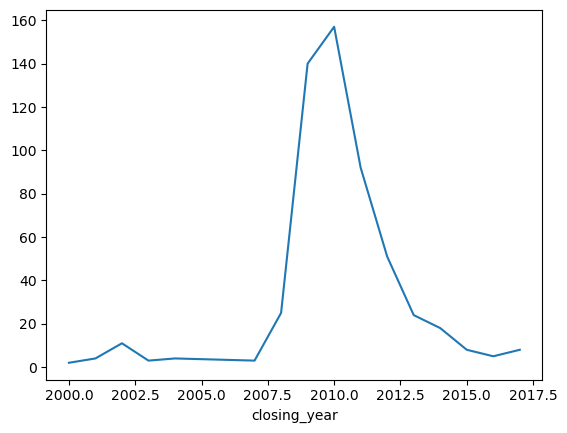

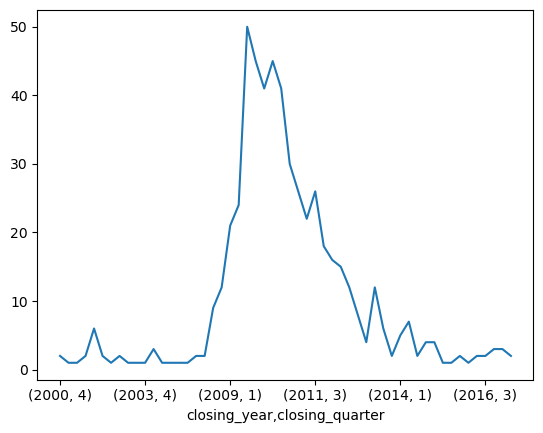

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [129]:
##테슬라 데이터 시간 계산

##pip install pandas-datareader

pd.core.common.is_list_libe = pd.api.types.is_list_like
import pandas_datareader as pdr

##tesla = pdr.get_data_quandl('TSLA', api_key = 'F2nUZpvYK34n3T5yMgXD')
##tesla.to_csv("C:\\Users\\rud92\\0.ESAA\\tesla_stock_quandl.csv")

tesla = pd.read_csv("C:\\Users\\rud92\\0.ESAA\\tesla_stock_quandl.csv")
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [133]:
tesla = pd.read_csv("C:\\Users\\rud92\\0.ESAA\\tesla_stock_quandl.csv", parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [135]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])


           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


In [145]:
tesla.index = tesla['Date']
print(tesla.index)    ## 날짜를 인덱스로 설정함
tesla.head()

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [141]:
print(tesla.loc['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [143]:
print(tesla.loc['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


In [147]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [149]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [151]:
print(tesla.loc['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


In [155]:
ebola = pd.read_csv(r"C:\Users\rud92\0.ESAA\country_timeseries.csv", parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [160]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [164]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [167]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


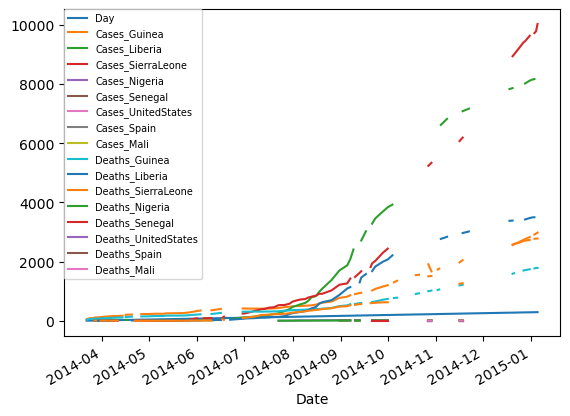

In [169]:
import matplotlib.pyplot as plt
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [171]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [177]:
ebola = pd.read_csv(r"C:\Users\rud92\0.ESAA\country_timeseries.csv", parse_dates=['Date'])
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])


        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [183]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [195]:
new_idx = list(reversed(list(new_idx)))

In [197]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [199]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


In [201]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [203]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [205]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [207]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [213]:
ebola_dict={}

for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted


ebola_shift = pd.DataFrame(ebola_dict)

C:\Users\rud92\AppData\Local\Temp\ipykernel_1768\3965272697.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [215]:
print(ebola_shift)

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                           
2015-01-05 2015-01-05  289.0        2776.0            NaN                NaN   
2015-01-04 2015-01-04  288.0        2775.0            NaN                NaN   
2015-01-03 2015-01-03  287.0        2769.0            NaN                NaN   
2015-01-02 2015-01-02  286.0           NaN            NaN                NaN   
2015-01-01        NaT    NaN           NaN            NaN                NaN   
...               ...    ...           ...            ...                ...   
2014-03-26 2014-03-26    4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25    3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24    2.0          86.0            7.0                NaN   
2014-03-23        NaT    NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22    0.0          49

In [217]:
ebola_shift.index = ebola_shift['Day']
ebola_shfit = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Day                                                                   
4.0 2014-03-26  4.0          86.0            8.0                2.0   
3.0 2014-03-25  3.0          86.0            NaN                NaN   
2.0 2014-03-24  2.0          86.0            7.0                NaN   
NaN        NaT  NaN           NaN            3.0                2.0   
0.0 2014-03-22  0.0          49.0            8.0                6.0   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Day                                                                  
4.0            1.0            NaN                 1.0          1.0   
3.0            NaN            NaN                 NaN          NaN   
2.0            NaN            NaN                 NaN          NaN   
NaN            NaN            NaN                 NaN          NaN   
0.0            0.0            1.0                 1.0          1.0   

     Cases_

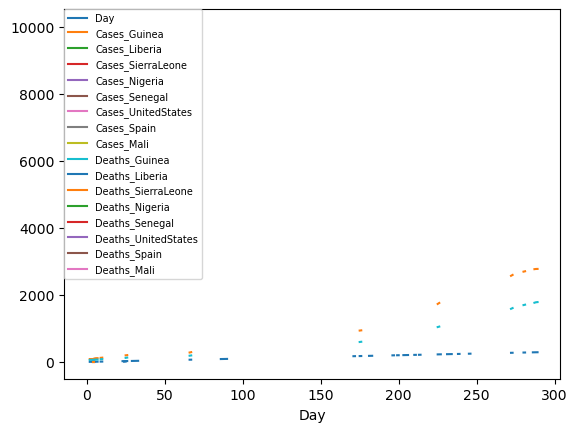

In [219]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()